# Relatório

#### Thiago Pádua de Carvalho - 2020007066
#### Natan Ventura - 2020065295

## Instrução para rodar o programa
Para gerar o executável, basta usar o comando **make**

Uma vez tendo o executável, basta rodar o comando

./tp2virtual [algoritmo] [arquivo] [tamanho da página] [tamanho da memória]

## Estruturas de Dados

### Página
Essa é a estrutura de dados que simboliza uma página de memória. Ela é representada através da struct PageTableEntry, contendo os seguintes campos:
- **PageNumber**: número identificador da página, simbolizando o endereço.
- **ReferenceBit**: bit de referência, que é setado para 1 quando a página é referenciada. Uso no algoritmo de Segunda Chance.
- **dirtyBit**: bit de sujeira, que é setado para 1 quando há leitura no endereço referenciado pela página.

### Tabela de Páginas
A principal estrutura de dados do programa é a Tabela de Páginas. Ela foi criada como uma struct PageTable, contendo os seguintes campos:
- **Entries**: vetor que contém as páginas. É sobre ele que são feitas todas as operações de inserção e substituição.
- **Size**: tamanho corrente da tabela de páginas.
- **Capacity**: capacidade máxima da tabela de páginas. 

Além das funções básicas de criação da tabela, insersão de páginas, verificação de capacidade atingida, temos as seguintes:
- **MemoryPosition**: função que retorna a posição de memória de uma página, dado seu número. Caso a página não esteja na tabela, retorna -1.
- **ReplacePage**: função que substitui uma página da tabela por outra. Ela recebe como parâmetro o número da página a ser substituída, o número e o modo (W/R) que determinam se o endereço será utilizado para leitura ou escrita.
- **ReplaceRandom**: função que substitui uma página aleatória da tabela por outra.

### Fila
A fila encadeada é a estrutura fundamental para o funcionamento do algoritmo FIFO. Ela controla a ordem de inserção e remoção de páginas da tabela de páginas. Sua implementação é a struct Queue, contendo os seguintes campos:
 - **Head**: ponteiro para o nó que é o primeiro elemento da fila.
 - **Tail**: ponteiro para o último elemento da fila.
 - **Size** e **Capacity**.
Suas funções são clássicas de inserção ao fim da fila, remoção do início da fila, verificação de fila cheia e busca de elemento a partir de um valor dado, que é o identificador de página.

#### Node 
A fila é composta por nós, que são representados pela struct Node, contendo prev, next e value, que são, respectivamente, ponteiros para o nó anterior, próximo o valor do nó, que é o número de página (identificador).

### Pilha Duplamente Encadeada
A abordagem escolhida para o algoritmo LRU foi com o uso da pilha. O duplo encadeamento permite remover uma página e inseri-la no topo da pilha com a alteração de, no máximo, seis ponteiros. Isso é fundamental porque é necessário que seja possível remover um elemento de qualquer posição da pilha. A implementação é através da struct DoublyLinkedStack, contendo os seguintes campos:

**Top** e **Bottom**, similares a head e tail da fila, sendo que cada um representa um Node, como o descrito anteriormente. Aqui também temos os campos **Size** e **Capacity**.

Suas funções principais são:
- **Push**: insere um elemento no topo da pilha.
- **PopBottom**: remove o elemento da base da pilha, que será a página menos recentemente utilizada.
- **PopFromData**: remove um elemento da pilha a partir de um valor dado, que é o identificador da página. Essa função é utilizada para remover uma página da pilha quando ela é referenciada, pois ela deve ser inserida no topo da pilha. Seu funcionamento é a base para a escolha dessa estrutura.

## Algoritmos de Substituição - Memória Virtual

### Passos em Comum
Todos os algoritmos devem manter controle sobre o número de page faults e o número de escritas na memória. Esses valores são incrementados, respectivamente, sempre que uma página é inserida na tabela de páginas ou quando o bit de sujeira de uma página substituida por outra - ou seja, que cede seu lugar na memória e é armazenada em disco - é setado para 1.

Além disso, eles mantêm um loop while que lê do arquivo de entrada os endereços de memória que serão referenciados, tais como os modos (leitura/escrita). 

Os algoritmos de substituição de páginas são implementados através de funções que recebem como parâmetro a tabela de páginas e o número da página que será referenciada. O primeiro passo é verificar se a página já está na tabela de páginas. Caso esteja, cada algoritmo lida com isso de uma forma e maneja o bit de sujeira, de maneira que este é setado para 1 se o modo for W(escrita). Caso a página não esteja na tabela, é feita a verificação de capacidade. Se a tabela estiver cheia, é feita a substituição de uma página e aumentamos o número de páginas escritas na ocasião de o dirty bit ser positivo. Caso contrário, a página é inserida na tabela.

### FIFO (First In First Out)
O algoritmo FIFO baseia-se na ideia de que a página mais antiga na memória deve ser a escolhida para substituição sempre que esta for necessária. Nesse sentido, o uso de uma fila encadeada é ideal para a implementação:

Iniciamos uma pilha vazia com exatamente o tamanho da memória e inserimos até que esta fique cheia. 

Toda vez que uma página nova chega, devemos verificar se a mesma já se encontra na memória. Em caso positivo, basta verificar se o modo de acesso ao endereço é escrita. Caso seja, devemos setar o "bit de sujeira para 1". Caso contrário, incementamos o número de page faults e passamos para a segunda parte do algoritmo:

Se a memória estiver cheia, devemos remover a página que está no início da fila, que é a mais antiga, e inserir a nova página no fim da fila. Caso a memória não esteja cheia, basta inserir a nova página no fim da fila.

### LRU (Least Recently Used)
A princípio do LRU é usar o passado recente como uma aproximação para o futuro próximo para então substituir a página que não foi usada pelo período de tempo mais longo. Ele é o algoritmo ótimo de substituição de páginas olhando para trás no tempo.

O modo escolhido para manter o rastreamento do tempo de cada página foi a partir de uma pilha duplamente encadeada. A cada referência a uma página, ela é inserida no topo da pilha. É aqui que essa estrura de dados tem seu destaque. Inserir no topo é O(1) e, como explicado anteriormente, ela permite remover um elemento de qualquer posição da pilha e inserí-lo no topo eficientemente.

Ao se deparar com uma nova página, o algoritmo se comporta de maneira similar ao FIFO, verificando se a página já está na memória. Caso esteja, ele a envia para o topo da pilha.
Caso contrário, se a memória estiver cheia removemos a página que está na base da pilha, que é a menos recentemente utilizada, e inseririmos a nova página no topo da pilha, completando a substituição.

### Segunda Chance (2a)
O algoritmo leva esse nome porque permite que uma página que seria substituída - porém foi usada recentemente - tenha uma segunda chance de permanecer na memória. Ele é uma versão mais eficiente do FIFO, pois ele não substitui a página mais antiga, mas sim uma antiga que não foi referenciada recentemente.

Os conceitos principais desse algoritmo são o bit de referência e o "ponteiro de relógio (clock pointer)": 

O bit de referência é um atibuto sempre iniciado com 0 ao se inserir uma página inédita na tabela e é atualizado para 1 quando a página é referenciada. O ponteiro de relógio tem esse nome porque percorre a memória circularmente no momento de substituição. Nesse trajeto, enquanto o bit de referência da página for 1, ele é responsável por dar a segunda chance. O bit é zerado, a página permanece na memória e o ponteiro continua seu ciclo. Ao se deparar com uma página com bit de referência 0, ela é substituída.

### Random
De todos os algoritmos, o random é o mais simples. Ele não requer estrutura de dados auxiliar e consiste em escolher uma página aleatória para substituição. Para isso, basta gerar um número aleatório entre 0 e o tamanho da memória e substituir a página que está na posição correspondente.

## Decisões de Projeto
Optamos por exibir um erro a cada vez que há uma entrada inválida. Quando nos deparamos com esta situação, pedimos para que o usuário digite uma entrada válida ou 0 para sair do programa.
Se, no entanto, houver menos argumentos que o esperado na linha de comando, exibimos uma mensagem e o programa é encerrado.

## Análise de Desempenho

### Memória Crescente - Tamanho de Página fixo

In [54]:
def divide_lista(lista):
    lista_impares = []
    lista_pares = []

    for i, elemento in enumerate(lista):
        if i % 2 == 0:
            lista_pares.append(elemento)
        else:
            lista_impares.append(elemento)

    return lista_impares, lista_pares

In [55]:
import subprocess
import matplotlib.pyplot as plt

# Caminho do executável do programa C
program_path = "./tp2virtual"

memorySizes = [2 ** i for i in range(7, 15)]
pageSize = 4
algorithms = ["lru", "2a", "fifo", "random"]
files = ["test_files/compilador.log", "test_files/compressor.log", "test_files/matriz.log", "test_files/simulador.log"]

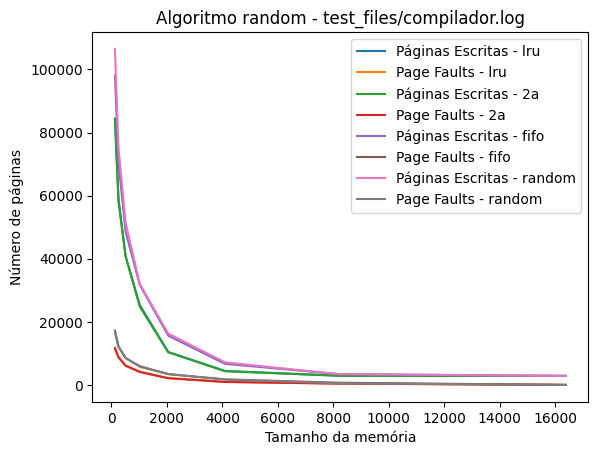

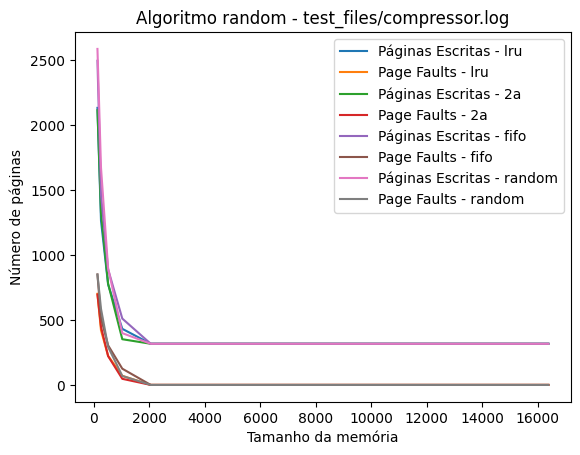

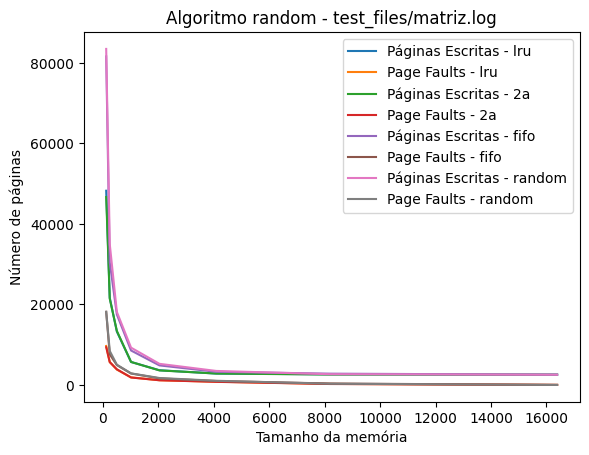

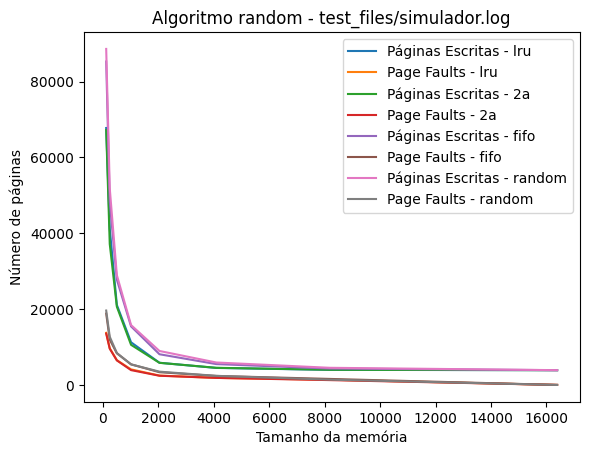

In [63]:
for file in files:
    for algorithm in algorithms:
        wpt = []
        pft = []
        for ms in memorySizes:
            arguments = [algorithm, file, str(pageSize), str(ms)]
            process = subprocess.Popen([program_path] + arguments, stdout=subprocess.PIPE)
            output, _ = process.communicate()
            output = output.decode('utf-8')
            # Extrai as duas últimas palavras das duas últimas linhas
            lines = output.strip().split('\n')
            # Obtém as duas últimas linhas
            last_two_lines = lines[-2:]
            # Obtém as últimas palavras das duas últimas linhas
            last_words = [line.split()[-1] for line in last_two_lines]
            # Imprime as últimas palavras
            wp, pf = divide_lista(last_words)
            wpt.append(wp[0])
            pft.append(pf[0])

        wpt = [int(x) for x in wpt]
        pft = [int(x) for x in pft]

        plt.plot(memorySizes, wpt, label=f"Páginas Escritas - {algorithm}")
        plt.plot(memorySizes, pft, label=f"Page Faults - {algorithm}")
        plt.legend()
    plt.xlabel("Tamanho da memória")
    plt.ylabel("Número de páginas")
    plt.title(f"Algoritmo {algorithm} - {file}")
    plt.show()
        



Podemos observar uma tendência de decrescimento do número de page faults conforme o tamanho da memória aumenta. Isso se deve ao fato de que quanto maior a memória, mais páginas podem ser armazenadas e, portanto, menos substituições são necessárias. Isso faz com que os números de page faults e páginas escritas tendam a se estabilizar para todos os algoritmos conforme o tamanho da memória tende ao infinito.

Dentre os algoritmos observados, o random é aquele que aparenta ser o menos efetivo, contando com mais pageFaults que os demais. Isso se deve ao fato de que ele não leva em consideração o histórico de uso das páginas, o que pode levar a substituições desnecessárias.

O fifo também apresenta desempenho pouco desejável, se comparado ao lru e ao 2a. Aqui fica claro que os algoritmos que têm algum mecanismo de registro sobre as páginas para fazer a escolha de substituição são mais eficientes.

2a e lru apresentam desempenho semelhante, com o lru sendo um pouco mais eficiente. Isso se deve ao fato de que o 2a não leva em consideração o tempo de uso das páginas, mas sim se elas foram referenciadas recentemente ou não.


### Memória fixa - Tamanho de Página crescente

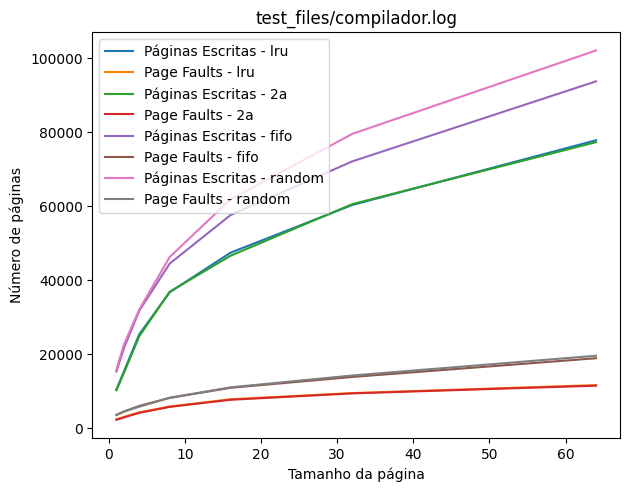

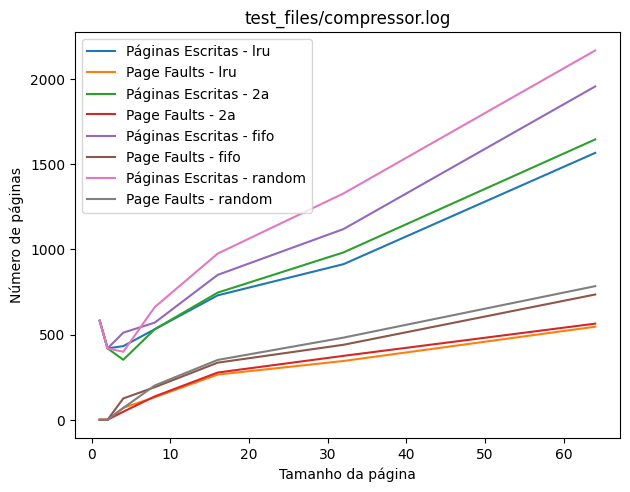

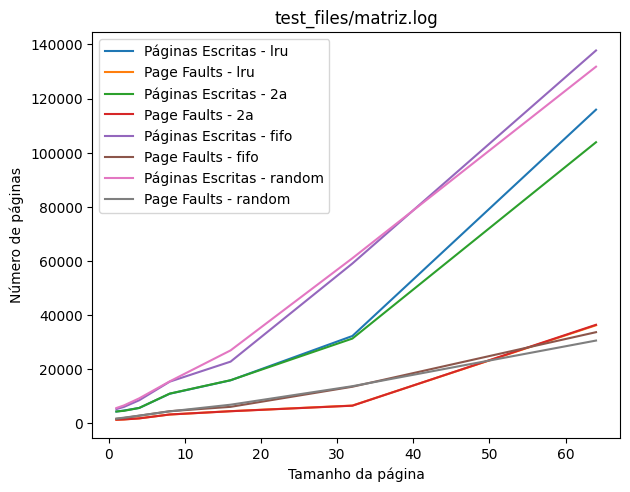

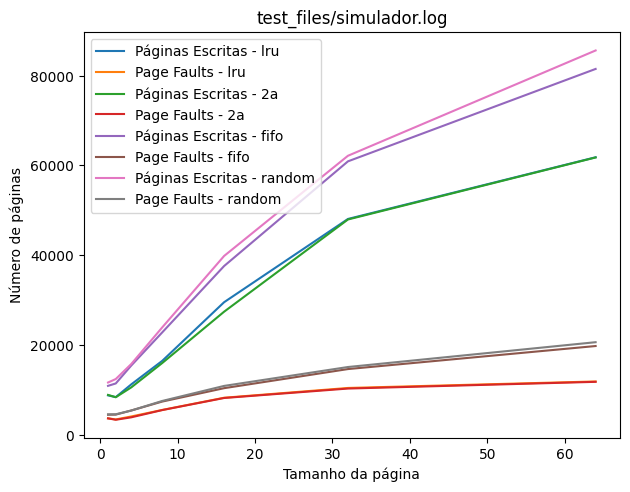

In [64]:
pageSizes = [2 ** i for i in range(0, 7)]
memorySize = 2 ** 10

for i, file in enumerate(files):
    for j, algorithm in enumerate(algorithms):
        wpt = []
        pft = []
        for ps in pageSizes:
            arguments = [algorithm, file, str(ps), str(memorySize)]
            process = subprocess.Popen([program_path] + arguments, stdout=subprocess.PIPE)
            output, _ = process.communicate()
            output = output.decode('utf-8')
            # Extrai as duas últimas palavras das duas últimas linhas
            lines = output.strip().split('\n')
            # Obtém as duas últimas linhas
            last_two_lines = lines[-2:]
            # Obtém as últimas palavras das duas últimas linhas
            last_words = [line.split()[-1] for line in last_two_lines]
            # Imprime as últimas palavras
            wp, pf = divide_lista(last_words)
            wpt.append(wp[0])
            pft.append(pf[0])
        
        wpt = [int(x) for x in wpt]
        pft = [int(x) for x in pft]

        plt.plot(pageSizes, wpt, label=f"Páginas Escritas - {algorithm}")
        plt.plot(pageSizes, pft, label=f"Page Faults - {algorithm}")
        plt.legend()

    plt.xlabel("Tamanho da página")
    plt.ylabel("Número de páginas")
    plt.tight_layout()
    plt.title(f"{file}")
    
    plt.show()
    

Aqui tem-se o efeito oposto. O número de page faults é diretamente proporcinal ao tamanho da página. Isso se deve ao fato de que quanto maior a página, menos páginas podem ser armazenadas na memória e, portanto, mais substituições são necessárias.

Random e fifo seguem com desempenho semelhante, com a política aleatória se mantém como a pior de todas.
Segunda chance e lru se sobrepõem por quase todos os valores, porém o algoritmo 2a se sobressai em alguns casos. Variando o programa, uma escolha pode ser melhor que a outra.

### Conclusões
FIFO e Random não tem um desempenho tão bom por não considerarem o histórico recente de uso de endereços de memória/páginas pelo processo. Eles são de simples implementação, porém não são eficientes.

LRU e Second Chance - que é uma aproximação do primeiro - são os mais eficientes, porém mais complexos de implementar.

A escolha final deve ser feita baseada em testes empíricos que levam em consideração o uso do programa. Também é fundamental considerar o custo de hardware que cada um dos métodos demanda, uma vez que o suporte da parte física do computador pode ser um desafio para a arquitetura de um sistema.